# Visualización de Datos - Plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('../datasets/customer-churn-model/Customer Churn Model.txt')

In [3]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
%matplotlib inline 

In [5]:
# savefig('path_donde_quieras_subir.jpeg') Para guardar imagen

## Scatter Plot

Sirve para ver rápidamente la correlatividad entre variables

<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

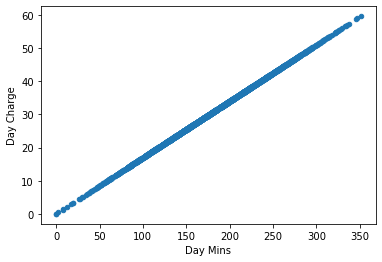

In [6]:
data.plot(kind='scatter', x='Day Mins', y='Day Charge')

<AxesSubplot:xlabel='Night Mins', ylabel='Night Charge'>

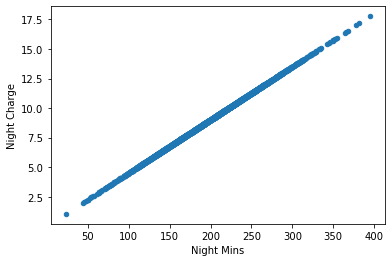

In [7]:
data.plot(kind='scatter', x='Night Mins', y='Night Charge')

Vamos a hacer varios gráficos para poder ver varias variables

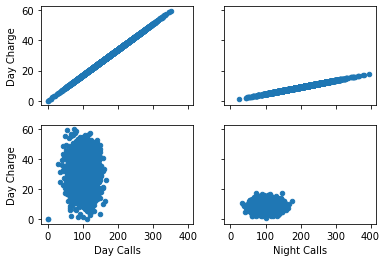

In [8]:
figure, axs = plt.subplots(2,2, sharey=True, sharex=True) #Nos crea una matriz de 2x2
data.plot(kind='scatter', x='Day Mins', y='Day Charge', ax=axs[0][0])
data.plot(kind='scatter', x='Night Mins', y='Night Charge', ax=axs[0][1])
data.plot(kind='scatter', x='Day Calls', y='Day Charge', ax=axs[1][0])
data.plot(kind='scatter', x='Night Calls', y='Night Charge', ax=axs[1][1])
plt.show()

---

## Histograma

In [9]:
data.columns.values

array(['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan",
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls',
       'Intl Charge', 'CustServ Calls', 'Churn?'], dtype=object)

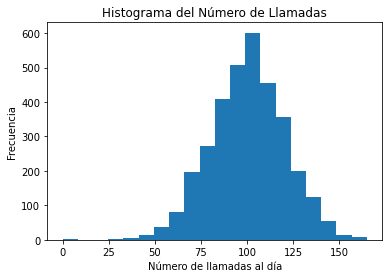

In [10]:
plt.hist(data['Day Calls'], bins = 20)
plt.xlabel('Número de llamadas al día')
plt.ylabel('Frecuencia')
plt.title('Histograma del Número de Llamadas')
plt.show()

### Ley de Sturges

La regla de Sturges es una propuesta práctida acerca del número de clases que deben considerar al elaborarse un histograma. \
Este número viene dado por la siguiente explresión:

$ c = 1 + log2(M) $ , donde $M$ es el tamaño de la muestra.

Que puede escribirse a partir de logarítmos base 10 de la siguiente forma:

$ c = 1 + \frac{log(M)}{log(2)} $ , donde $M$ es el tamaño de la muestra.

El valor de c (número de clases) es común redondearlo, si tu entero resultante es par, se redondea a la alta, y si es impar, se redondea a la baja.

In [11]:
# Por la regla de sturges
def k_sturges(n):
    if n%2==0:
        return int(n.ceil(1 + np.log2(n)))
    else:
        return int(np.floor(1 + np.log2(n)) )

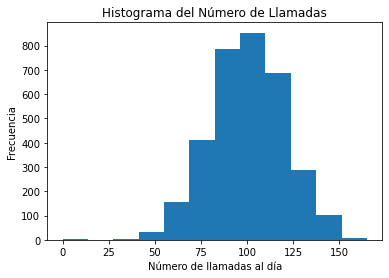

In [12]:
plt.hist(data['Day Calls'], bins = k_sturges(data.shape[0]))
plt.xlabel('Número de llamadas al día')
plt.ylabel('Frecuencia')
plt.title('Histograma del Número de Llamadas')
plt.show()

---

## Boxplot

In [13]:
data['Day Calls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

La forma de leerlo es simple. \
La caja marca el 50% de los datos, es decir, que la raya que se crea a la mitad es la media. Su línea superior dentro de la caja, demuestra el 75% de los datos, es decir, el comienzo del 4to cuartil. La línea inferior dentro de la caja es el 25% de los datos, es decir, el comienzo del 2do cuartil.

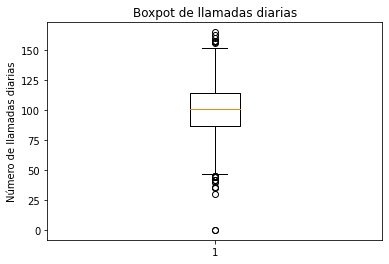

In [14]:
plt.boxplot(data['Day Calls'])
plt.ylabel('Número de llamadas diarias')
plt.title('Boxpot de llamadas diarias')
plt.show()

Si restamos el 4to cuartil menos el 2do cuartil, tenemos el rango intercuartial. Este es muy importante, ya que nos dice el tamaño o altitud de la caja.

In [15]:
q3, q1 = np.percentile(data['Day Calls'], [75,25])
iqr = q3 - q1
print(f'El rango intercuartil es: {iqr}')

El rango intercuartil es: 27.0


Los bigotes por lo general se colocan a 1.5 veces el rango intercuartil como máximo.

In [16]:
print(f'El bigote superior es {q3+iqr*1.5}')
print(f'El bigote inferior es {q1-iqr*1.5}')

El bigote superior es 154.5
El bigote inferior es 46.5


Todo lo que queda fuera, ya sea por abajo o por encima de los bigotes, se llaman **outlier**, que son valores fuera de lo común.